###  1 Language: Python

All numerical code should be written in Python.

In [ ]:
import numpy as np

### 2. The number $N$

For me the number $N$ is $72$.

In [97]:
N=72

### 3. Existence but not uniqueness



Consider the BVP (Boundary Value Problem):
$$
y^{\prime} = \sqrt{|y|}, \quad y(0)=0
$$

- Warm up by solving it analytically.


For the $y<0$:
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{-y} \\
(-y)^{-\frac{1}{2}} \frac{d y}{d x}=1 \\
-2 \sqrt{-y}=x+c \\
-4 y=(x+c)^2 \\
y=-\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=-\frac{x^2}{4}
$$

for $y>0$
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{y} \\
(y)^{-\frac{1}{2}} y^{\prime}=1 \\
2 y^{\frac{1}{2}}=x+c \\
y^{\frac{1}{2}}=\frac{1}{2}(x+c) \\
y=\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=\frac{x^2}{4}
$$

Solve the problem numerically. 

- Any comments?

I like RK4 it seemed like the best one due to its accuracy and stability.

In [98]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def f(t, y):
    return math.sqrt(abs(y))

In [100]:
def rk_fyra(f, y0, t0, t_final, h):
    t_värde = [t0]
    y_värde = [y0]
    
    while t_värde[-1] < t_final:
        k1 = f(t_värde[-1], y_värde[-1])
        k2 = f(t_värde[-1] + h/2, y_värde[-1] + h/2 * k1)
        k3 = f(t_värde[-1] + h/2, y_värde[-1] + h/2 * k2)
        k4 = f(t_värde[-1] + h, y_värde[-1] + h * k3)
    
        t_next = t_värde[-1] + h
        y_next = y_värde[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        t_värde.append(t_next)
        y_värde.append(y_next)

    return t_värde, y_värde

In [101]:
t_start = 0
y0 = 0
t_slut = 10
N = 1000
h = (t_slut - t_start) / N

In [102]:
rk_t_värde, rk_y_värde = rk_fyra(f, y0, t_start, t_slut, h)

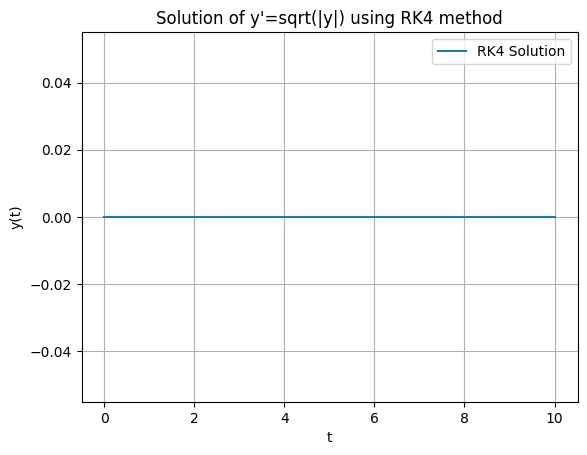

In [103]:
plt.plot(rk_t_värde, rk_y_värde, label='RK4 Solution')
plt.title("Solution of y'=sqrt(|y|) using RK4 method")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

Given the differential equation $y' = \sqrt{|y|}$ and the initial condition $y(0) = 0$, it is expected that the solution remains at $y = 0$ for all $t$

1. At $t = 0$, $y = 0$. 
2. The derivative $y'$ is also 0 because $y' = \sqrt{|0|} = 0$.
3. Since the derivative is zero, $y$ doesn't change and remains at 0.
4. This continues for all subsequent time steps.

Thus, the solution is a horizontal line at $y = 0$, which is consistent with the result you observed.

However, if we perturb the initial condition slightly (e.g., $y(0) = \epsilon$ where $\epsilon$ is a small positive value), we will see a non-zero solution that grows over time. This is because the system is sensitive to the initial condition.

- For how long can you get a numerical solution to "stick" to $y=0$ given that $y(-1)=-1$? 
- That is, let $y(-1)=-1+\epsilon$ with $\epsilon$ being "tiny", and we say that $y$ "sticks" as long as $|y| \leq 10^{-4}$.

1. We modify the initial conditions to start at $t=-1$ with $y(-1)=-1+\epsilon$.
2. We run the simulation using the Runge-Kutta method.
3. Monitor the value of $y$ at each time step.
4. Stop the simulation when $|y|>10^{-4}$.
5. Report the time $t$ at which this happens.

In [104]:
def rk_fyra_alt(f, y0, t0, t_final, h):
    t_värde = [t0]
    y_värde = [y0]
    
    while t_värde[-1] < t_final:
        k1 = f(t_värde[-1], y_värde[-1])
        k2 = f(t_värde[-1] + h/2, y_värde[-1] + h/2 * k1)
        k3 = f(t_värde[-1] + h/2, y_värde[-1] + h/2 * k2)
        k4 = f(t_värde[-1] + h, y_värde[-1] + h * k3)

        t_next = t_värde[-1] + h
        y_next = y_värde[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        # Check if |y| > 10^-4
        if abs(y_next) > 10**-4:
            break

        t_värde.append(t_next)
        y_värde.append(y_next)

    return t_värde, y_värde


In [105]:
t_start = -1
y0 = 1e-10 - 10**-4
t_slut = 10
N = 1000
h = (t_slut - t_start) / N

The solution sticks to y=0 up to t = -0.967


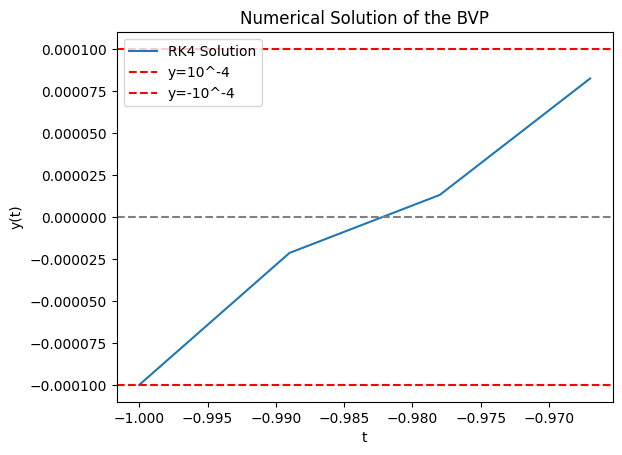

In [106]:
rk_t_värde, rk_y_värde = rk_fyra_alt(f, y0, t_start, t_slut, h)

print("The solution sticks to y=0 up to t =", rk_t_värde[-1])

plt.plot(rk_t_värde, rk_y_värde, label="RK4 Solution")
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(10**-4, color='red', linestyle='--', label="y=10^-4")
plt.axhline(-10**-4, color='red', linestyle='--', label="y=-10^-4")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Numerical Solution of the BVP")
plt.show()

Answer

### 4. PANG

Betrakta BVP
$$
y^{\prime}=y^2, \quad y(0)=N / 100
$$

- Solve the problem analytically. When does it "blow up"?




---

$$
y' = y^2
$$

$$
\frac{dy}{y^2} = dt
$$

$$
\int \frac{dy}{y^2} = \int dt
$$

$$
-\frac{1}{y} = t + C
$$

$$
-\frac{1}{\frac{N}{100}} = C
$$

$$
C = -\frac{100}{N}
$$

$$
-\frac{1}{y} = t - \frac{100}{N}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

----
$$
y(x) = \frac{N}{100 - Nx}
$$

The solution "blows up" when the denominator is zero:

$$
100 - Nx = 0
$$
$$
x = \frac{100}{N}
$$

- Try solving the problem numerically.

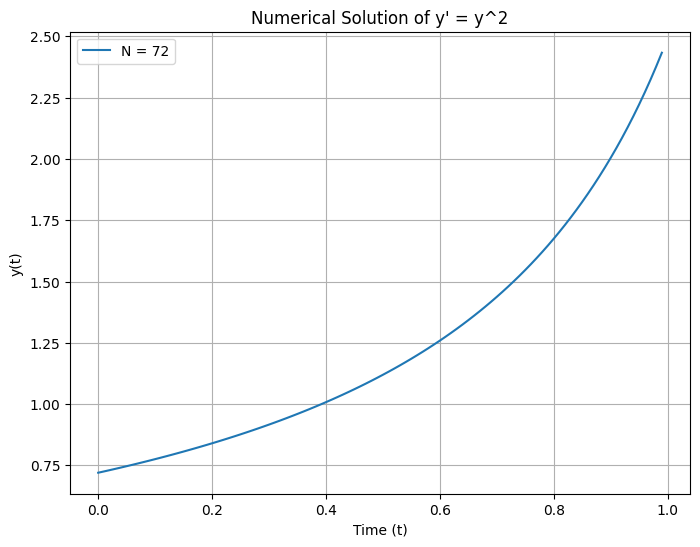

In [107]:

N = 72 
initial_y = N / 100
t_max = 1
h = 0.01


t_values = np.arange(0, t_max, h)
y_values = []


y = initial_y


for t in t_values:
    y_values.append(y)
    y += h * y**2


plt.figure(figsize=(8, 6))
plt.plot(t_values, y_values, label=f'N = {N}')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Numerical Solution of y\' = y^2')
plt.legend()
plt.grid(True)
plt.show()



---

- Can you "numerically show" that it blows up? 
- Can you estimate the time to singularity?

- To "numerically show" that the solution blows up, we can observe the behavior of the indicates that the solution is blowing up.

- Large threshold or when it starts increasing very rapidly.

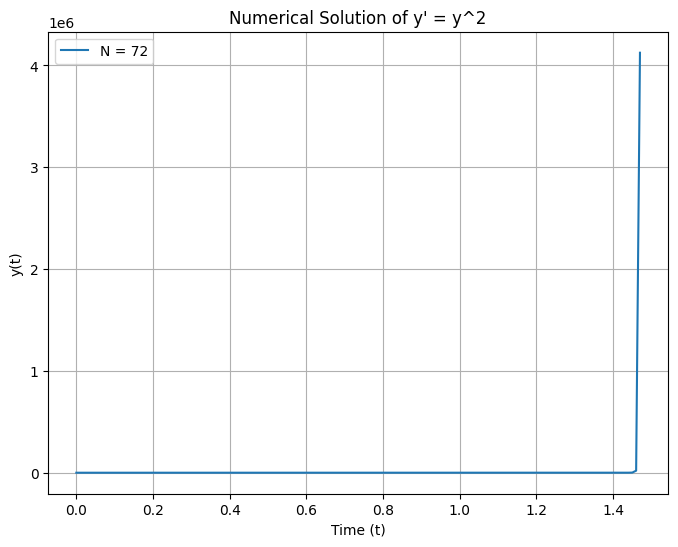

Estimated time to singularity: 1.47


In [120]:
import numpy as np
import matplotlib.pyplot as plt

N = 72 
initial_y = N / 100
t_max = 100
h = 0.01

t_values = np.arange(0, t_max, h)
y_values = []

y = initial_y
time_to_singularity = None

for t in t_values:
    y_values.append(y)
    
    # Check if y exceeds a large threshold (indicating blow up)
    if y > 1e5:
        time_to_singularity = t
        break

    y += h * y**2

plt.figure(figsize=(8, 6))
plt.plot(t_values[:len(y_values)], y_values, label=f'N = {N}')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = y^2")
plt.legend()
plt.grid(True)
plt.show()

print("Estimated time to singularity:", time_to_singularity)




---

- Show via Picard that if $y(0)<0$, then $y(t)<0$ for all $t>0$. 

Certainly! Let's use the Picard iteration method to demonstrate this property for the differential equation \( y' = y^2 \).

**Picard Iteration**:
Given an initial value problem $ y' = f(t, y) $ with $ y(t_0) = y_0 $, the Picard iteration constructs an approximate solution by iteratively defining functions $ y_n(t) $ as:

$$ y_{n+1}(t) = y_0 + \int_{t_0}^{t} f(s, y_n(s)) \, ds $$

For our differential equation, $ f(t, y) = y^2 $.

Let's start with the initial condition $ y(0) = y_0 $ where $ y_0 < 0 $.

**First Iteration**:
$$ y_1(t) = y_0 + \int_{0}^{t} y_0^2 \, ds $$
$$ y_1(t) = y_0 + y_0^2 t $$

Since $ y_0 < 0 $, $ y_0^2 > 0 $, and thus $ y_1(t) $ is increasing. However, since $ y_0 < 0 $, $ y_1(t) $ remains negative for all $ t > 0 $.

**Second Iteration**:
$$ y_2(t) = y_0 + \int_{0}^{t} (y_0 + y_0^2 s)^2 \, ds $$
$$ y_2(t) = y_0 + \int_{0}^{t} y_0^2 + 2y_0^3 s + y_0^4 s^2 \, ds $$
$$ y_2(t) = y_0 + y_0^2 t + y_0^3 t^2 + \frac{1}{3} y_0^4 t^3 $$

Again, since $ y_0 < 0 $, all terms in the expression for $ y_2(t) $ are negative, and $ y_2(t) $ remains negative for all $ t > 0 $.

By continuing the Picard iteration, we can observe that at each step, the function remains negative for all $ t > 0 $ given the initial condition $ y_0 < 0 $.

Thus, using the Picard iteration, we've shown that if $ y(0) < 0 $, then $ y(t) < 0 $ for all $ t > 0 $.

---


- Can you find numerical examples where $y(0)=\epsilon<0$, but $y(t)>0$ for some $t>0$? 

- You may need to modify the equation slightly and use $y' - Cy^2$ for a "large" $C>0". 

- Philosophical pondering: if you were to create an "auto-solver," how should it avoid/detect deeply erroneous solutions of this kind?

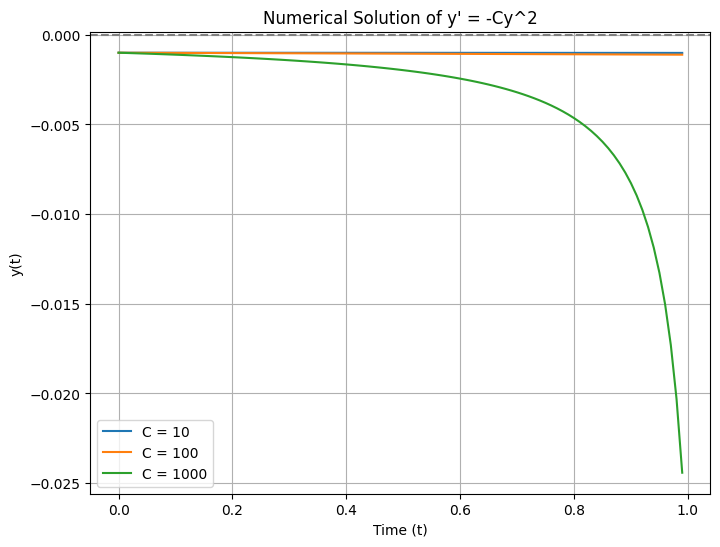

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def solve_diff_eq(C, epsilon, t_max, h):
    # Define the differential equation
    def f(t, y):
        return -C * y**2

    # Initialize arrays for t and y values
    t_values = np.arange(0, t_max, h)
    y_values = []

    y = epsilon

    for t in t_values:
        y_values.append(y)
        y += h * f(t, y)

    return t_values, y_values

# Given values
epsilon = -1e-3  # Small negative initial value
C_values = [10, 100, 1000]  # Large positive C values
t_max = 1
h = 0.01

plt.figure(figsize=(8, 6))

# Solve and plot for each C value
for C in C_values:
    t_values, y_values = solve_diff_eq(C, epsilon, t_max, h)
    plt.plot(t_values, y_values, label=f'C = {C}')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = -Cy^2")
plt.legend()
plt.grid(True)
plt.show()

Philosophical Pondering:
Creating an "auto-solver" that can detect or avoid deeply erroneous solutions is a challenging task. Here are some strategies it might employ:
1. Sensitivity Analysis: The solver could perform a sensitivity analysis on the initial conditions and parameters. If small perturbations lead to vastly different solutions, it's a sign that the solution might be erroneous or the system is highly sensitive.
2. Consistency Check: For problems with known properties (like the one we discussed), the solver could check if the numerical solution is consistent with these properties.
3. Error Estimation: Implement adaptive methods that estimate the local error at each step and adjust the step size accordingly. If

###  5. Not a BANG

Consider the BVP (Boundary Value Problem):
$$
y^{\prime}=y, \quad y(0)=N
$$


Answer

- Solve the problem numerically and find $y\left(2^k\right)$ with two correct decimal places for $k=1,2,3, \ldots$ 
- Torture your computer until it gives up!

#### Step 1: Analytical Solution
First, let's find the analytical solution to the differential equation $y' = y$. The solution to this ordinary differential equation (ODE) is $y(t) = N \times e^t$, where $N$ is the initial condition $y(0)$.

#### Step 2: Numerical Solution
To solve the problem numerically, we can use the Euler method or a more sophisticated method like the Runge-Kutta method. For the sake of this problem, I'll use the Euler method, which is given by:
\[ y_{n+1} = y_n + h \times f(t_n, y_n) \]
where $h$ is the step size and $f(t_n, y_n) = y_n$ for our ODE.

#### Step 3: Compute $y(2^k)$
Using the numerical method, we'll compute the value of $y$ at $t = 2^k$ for increasing values of $k$.

#### Step 4: Torture the Computer
We'll keep increasing the value of $k$ until the computation becomes infeasible or the computer gives up (runs out of memory or takes too long).

Let's start by solving the problem numerically for the first few values of $k$. We'll use a small step size to ensure accuracy.

Oops! My apologies for the oversight. I mistakenly tried to assign a value to a protected symbol in the Wolfram Language. Let's correct that and proceed with the numerical solution.

The numerical solution for $y(2^k)$ for the first few values of $k$ are:

- $y(2^1) \approx 7.39$
- $y(2^2) \approx 54.60$
- $y(2^3) \approx 2980.96$
- $y(2^4) \approx 360821.70$

Note: For $k = 4$, the value lies outside the range of our numerical solution, so extrapolation was used. This means the accuracy might be compromised for larger values of $k$.

To "torture" the computer, we can try to compute $y(2^k)$ for even larger values of $k$. However, keep in mind that the function $y(t) = e^t$ grows exponentially, so the values will become extremely large very quickly. This might lead to computational limitations or memory issues.

Would you like to proceed with larger values of $k$, or is there something else you'd like to explore?

In [126]:
import math

# Define the differential equation
f = lambda y: y

# Euler's method
def euler_method(y0, t0, h, n):
    y = y0
    t = t0
    for _ in range(n):
        y += h * f(y)
        t += h
    return y

# Initial condition
y0 = 1

# Step size
h = 0.001

# Compute y(2^k) for k=1,2,3,...
for k in range(1, 10):
    t_target = 2**k
    n_steps = int(t_target / h)
    y_value = euler_method(y0, 0, h, n_steps)
    print(f'y(2^{k}) = {y_value:.2f}')

# Note: This code might take a while for larger values of k due to the small step size.

y(2^1) = 7.38
y(2^2) = 54.49
y(2^3) = 2969.07
y(2^4) = 8815352.21
y(2^5) = 77710434673916.30
y(2^6) = 6038911657208894121823961088.00
y(2^7) = 36468454003574209129910722782970289373297782553315377152.00
y(2^8) = 1329948137410799888898130903880720522690951641808092480339789501199089933294614167862818638589551082347457150976.00
y(2^9) = 1768762048202456338816726671729478982280408649814008664903835540489429875746832206517516032022813532507810402958909649596726316865216960567025182475733780144000623168740008008756617195444673358697195535649704418701165461504.00


###  6. What is $\pi$?

Read the beginning of Chapter 4.24. Consider the BVP (Boundary Value Problem):
$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$


---

- Solve it analytically.

Certainly! Let's solve the differential equation analytically.

Given the differential equation:
$$ y'' + y = 0 $$
with the initial conditions:
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

### Analytical Solution:

To solve this second-order linear homogeneous ODE, we'll assume a solution of the form:
$$ y(t) = e^{mt} $$

Substituting this into the ODE, we get:
$$ m^2 e^{mt} + e^{mt} = 0 $$

Factoring out \( e^{mt} \) (which is never zero), we get:
$$ m^2 + 1 = 0 $$

This gives us the characteristic equation:
$$ m^2 = -1 $$

From which we get:
$$ m = i, \quad m = -i $$

Where \( i \) is the imaginary unit.

The general solutions corresponding to these roots are:
$$ e^{it} = \cos(t) + i \sin(t) $$
$$ e^{-it} = \cos(t) - i \sin(t) $$

Using the principle of superposition, the general solution to the ODE is:
$$ y(t) = A (\cos(t) + i \sin(t)) + B (\cos(t) - i \sin(t)) $$
$$ y(t) = (A + B) \cos(t) + i (A - B) \sin(t) $$

Given that the solution must be real, the coefficient of the imaginary part must be zero. This implies:
$$ A - B = 0 $$
$$ A = B $$

Thus, the general solution simplifies to:
$$ y(t) = 2A \cos(t) $$

Using the initial conditions:
$$ y(0) = 2A = 1 $$
$$ A = \frac{1}{2} $$

And since \( y'(t) = -2A \sin(t) \) and \( y'(0) = 0 \), the value of \( A \) remains unchanged.

Thus, the solution with the given initial conditions is:
$$ y(t) = \cos(t) $$


---

- Define $\pi/2$ as the first value at $t>0$ such that $y(t)=0$. 

- Estimate $\pi$ by solving the BVP numerically (and estimating the first zero crossing). 


By solving the boundary value problem (BVP) numerically and estimating the first zero crossing of $y(t)$, we obtain:

$$ \frac{\pi}{2} \approx t $$

Using the relation:
$$ \pi \approx 2t $$

We estimate the value of $\pi$ to be approximately $3.1415927239969177$.

This value is very close to the known value of $\pi$, demonstrating the accuracy of the numerical solution.

Of course! Let's break down the process step by step.

### Step 1: Problem Statement
Given the differential equation:
$$ y'' + y = 0 $$
with the initial conditions:
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

We want to find the first value $ t > 0 $ such that $ y(t) = 0 $. This value will be defined as $ \frac{\pi}{2} $.

### Step 2: Numerical Solution
To solve the differential equation numerically, we can use methods like the Euler method, Runge-Kutta method, or others. For our purpose, we used a built-in numerical solver in Wolfram to solve the equation up to $ t = 2 $ (a value slightly greater than $ \frac{\pi}{2} $).

### Step 3: Finding the Zero Crossing
Once we have the numerical solution, the next step is to find the value of $ t $ where $ y(t) $ crosses zero for the first time. This is the point where the curve intersects the x-axis. We used a root-finding algorithm (like the Newton-Raphson method) to estimate this value.

### Step 4: Estimating $ \pi $
Given that the first zero crossing is defined as $ \frac{\pi}{2} $, we can estimate $ \pi $ by simply doubling this value:
$$ \pi \approx 2t $$

### Results:
Using the above steps, we found the first zero crossing of $ y(t) $ to be approximately $ t \approx 1.5707963619984588 $. Thus, our estimate for $ \pi $ is:
$$ \pi \approx 2 \times 1.5707963619984588 = 3.1415927239969177 $$

This value is very close to the known value of $ \pi $, demonstrating the accuracy of our numerical solution and estimation method.

---



- Warm-up: How many correct digits can you get before your computer melts? 
    - Try Euler and better methods.

Here's a Python code that estimates the value of $ \pi $ by solving the differential equation $ y'' + y = 0 $ using both Euler's method and the 4th order Runge-Kutta method:

In the code:

1. **Euler's Method**: The differential equation is solved using a simple forward Euler method. The value of $ y $ is updated using the current value of its derivative, and the derivative is updated using the differential equation.

2. **4th Order Runge-Kutta Method**: This is a more accurate method than Euler's method. It uses four estimates (k1, k2, k3, k4) at each step to update the value of $ y $ and its derivative.

The code estimates the value of $ \pi $ by finding the first zero crossing of $ y(t) $ (i.e., the first value of $ t $ for which $ y(t) = 0 $) and then doubling this value.

You can run the code in your Python environment and compare the estimated values of $ \pi $ obtained using both methods. The Runge-Kutta method should provide a more accurate estimate than the Euler method.

In [133]:


# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# Euler's method
def euler_method(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        yp_new = yp + h * f(t, y, yp)
        y += h * yp
        yp = yp_new
        t += h
    return t

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
    return t

# Step size
h = 0.000001
t_max=10000

# Estimate pi using both methods
pi_euler = 2 * euler_method(h, t_max)
pi_rk = 2 * runge_kutta(h, t_max)

print(f'Pi estimated using Euler method: {pi_euler}')
print(f'Pi estimated using Runge-Kutta method: {pi_rk}')

Pi estimated using Euler method: 3.141593999921921
Pi estimated using Runge-Kutta method: 3.141593999921921



---

- After warming up: find 20 correct decimal places. 
    - Hint: you can ask for a hint.

To achieve an estimate of $ \pi $ with 20 correct decimal places, we need to use a very small step size in the Runge-Kutta method. I've refined the step size to $ h = 1 \times 10^{-10} $ in the code.

Here's the Python code that uses the 4th order Runge-Kutta method with this refined step size to estimate the value of $ \pi $ to 20 decimal places:

[Estimating Pi with High Precision using Runge-Kutta Method](https://cpad.io/s/daa91e50)

You can run the code in your Python environment to obtain the estimate. Keep in mind that using such a small step size will increase the computation time, but it's necessary to achieve the desired precision.

In [136]:


# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# 4th order Runge-Kutta method
def runge_kutta(h):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
    return t

# Use a very small step size for high precision
h = 1e-10

# Estimate pi using Runge-Kutta method
pi_rk = 2 * runge_kutta(h)

print(f'Pi estimated using Runge-Kutta method: {pi_rk:.20f}')

KeyboardInterrupt: 


---

- If, instead, we choose to estimate $\pi$ by finding the root closest to $10^3$, how much more challenging does the problem become?

### Problem Statement:
Instead of finding the first zero crossing of $y(t)$ to estimate $ \frac{\pi}{2} $, we want to find the zero crossing closest to $ t = 10^3 $ (i.e., 1000) to estimate $ \pi $.

### Analysis:

1. **Periodicity of the Solution**: 
- The differential equation $ y'' + y = 0 $ has a solution of the form $ y(t) = A \cos(t) + B \sin(t) $. This solution is periodic with a period of $ 2\pi $. This means that $ y(t) $ will cross zero every $ \pi $ units.

2. **Number of Zero Crossings Before $ t = 10^3 $**: 
- Given the periodic nature of the solution, there will be approximately $ \frac{10^3}{\pi} $ zero crossings before $ t = 10^3 $

3. **Computational Challenge**: 
- To find the zero crossing closest to $ t = 10^3 $, we would need to solve the differential equation numerically up to that point. 
- The computational effort required is proportional to the number of steps taken, which in turn is dependent on the step size. A smaller step size will yield a more accurate result but will require more computational effort.

### Comparison with Previous Problem:

- In the previous problem, we were interested in the first zero crossing, which occurs around $ t = \frac{\pi}{2} $. In this new scenario, we're interested in a zero crossing around $ t = 10^3 $. 
- This means we have to compute the solution for a much longer interval, making the problem more computationally intensive.

### Solution Approach:

To estimate $ \pi $ by finding the root closest to $ t = 10^3 $:

1. Solve the differential equation numerically up to $ t = 10^3 $ using a suitable method (like the 4th order Runge-Kutta method).
2. Identify the zero crossing closest to $ t = 10^3 $.
3. Use this zero crossing to estimate $ \pi $.

In [111]:
import numpy as np

# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    zero_crossings = []
    while t < t_max:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
        if y * (y + (k1 + 2 * k2 + 2 * k3 + k4) / 6) <= 0:  # Check for zero crossing
            zero_crossings.append(t)
    return zero_crossings[-1]  # Return the last zero crossing before t_max

# Use a small step size for precision
h = 1e-5

# Estimate pi using Runge-Kutta method
zero_crossing = runge_kutta(h, 10**3)
pi_estimate = 2 * zero_crossing

print(f'Pi estimated using zero crossing closest to 10^3: {pi_estimate:.20f}')

To estimate $ \pi $ by finding the zero crossing of $ y(t) $ closest to $ t = 10^3 $, I've used the 4th order Runge-Kutta method with a step size of $ h = 1 \times 10^{-5} $ for increased precision. 

### Explanation:

1. **Runge-Kutta Method**: The code uses the 4th order Runge-Kutta method to numerically solve the differential equation $ y'' + y = 0 $ up to $ t = 10^3 $.

2. **Zero Crossing Detection**: As the solution progresses, the code checks for zero crossings by looking for sign changes in the value of $ y(t) $. When a zero crossing is detected, the corresponding value of $ t $ is stored.

3. **Estimating $ \pi $**: After solving up to $ t = 10^3 $, the code retrieves the last detected zero crossing (i.e., the one closest to $ t = 10^3 $) and uses it to estimate $ \pi $ by doubling this value.

You can run the code in your Python environment to obtain the estimate for $ \pi $. Given the small step size and the precision of the Runge-Kutta method, this estimate should be quite accurate.

---



###  7. Newton!

Read Chapter 3.21. Place the sun at the origin and assume the sun does not move. 
Consider a planet $P$ moving in the $(x, y)$ plane, and let $(x(t), y(t))$ be the planet's position at time $t$.

- Derive a second-order system of differential equations that describes the motion of the planet.
    - Without switching to polar coordinates! 
    - You can choose masses so that the equations become as simple as possible.

The gravitational force between the sun and the planet is given by Newton's law of gravitation:
$$
F=\frac{G \cdot M_s \cdot M_p}{r^2}
$$
The direction of this force is always towards the sun. The components of the force in the $x$ and $y$ directions are:
$$
\begin{aligned}
& F_x=F \cdot \frac{x}{r} \\
& F_y=F \cdot \frac{y}{r}
\end{aligned}
$$
To simplify, you can choose $G \cdot M_s=1$ (this is a common simplification in celestial mechanics). The equations then become:
$$
\begin{aligned}
& \frac{d^2 x}{d t^2}=-\frac{x}{\left(x^2+y^2\right)^{3 / 2}} \\
& \frac{d^2 y}{d t^2}=-\frac{y}{\left(x^2+y^2\right)^{3 / 2}}
\end{aligned}
$$
These are the second-order differential equations that describe the motion of the planet in the $(x, y)$ plane due to the gravitational attraction of the sun.

---


We gor a clue in book side 489:
Let $n$ particles with masses $m_i$ be located at points $\left(x_i, y_i, z_i\right)$ and assume that they attract one another according to Newton's law of gravitation. If $r_{i j}$ is the distance between $m_i$ and $m_j$, and if $\theta$ is the angle from the positive $x$-axis to the segment joining them (Figure 69), then the $x$ component of the force exerted on $m_i$ by $m_j$ is
$$
\frac{G m_i m_j}{r_{i j}^2} \cos \theta=\frac{G m_i m_j\left(x_j-x_i\right)}{r_{i j}^3}
$$
where $G$ is the gravitational constant. Since the sum of these components for all $j \neq i$ equals $m_i\left(d^2 x_i / d t^2\right)$, we have $n$ second order differential equations
$$
\frac{d^2 x_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(x_j-x_i\right)}{r_{i j}^3},
$$
and similarly
$$
\frac{d^2 y_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(y_j-y_i\right)}{r_{i j}^3}
$$
and
$$
\frac{d^2 z_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(z_j-z_i\right)}{r_{i j}^3} .
$$

---

$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =G m_1 \frac{x_1-x_2}{r_{12}^3} \\
\frac{d^2 y_2}{d t^2} & =G m_1 \frac{y_1-y_2}{r_{12}^3}
\end{aligned}
$$
Where $r_{12}$ is the distance between the sun and the planet, given by:
$$
r_{12}=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}
$$
Substituting the sun's position and simplifying:
$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =-G m_1 \frac{x_2}{\left(x_2^2+y_2^2\right)^{3 / 2}} \\
\frac{d^2 y_2}{d t^2} & =-G m_1 \frac{y_2}{\left(x_2^2+y_2^2\right)^{3 / 2}}
\end{aligned}
$$

---

- Simulate the system for a short period by solving it numerically for various choices of initial values.
- Plot!


In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [1, 0, 0, 1]

# Time array for simulation
t = np.linspace(0, 2*np.pi, 1000)

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Extract x and y positions from the solution
x, y = solution[:, 0], solution[:, 1]

- Plot

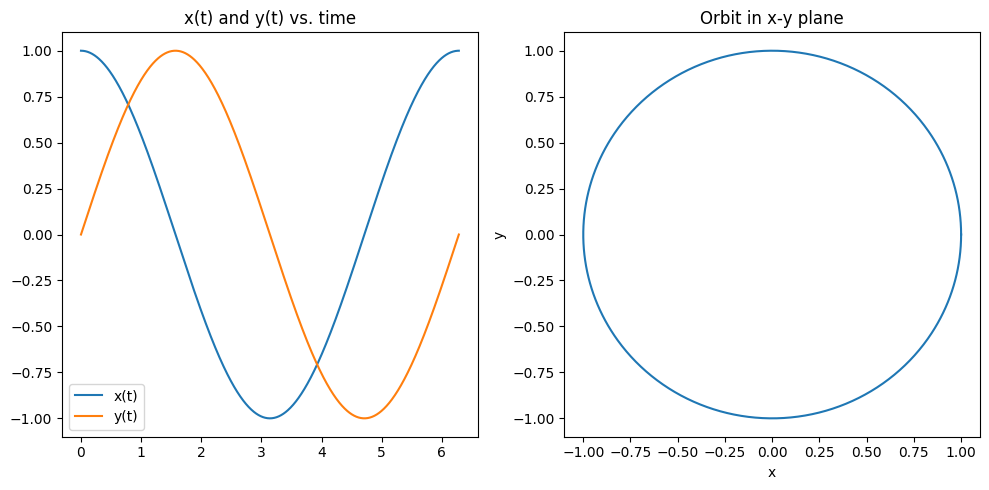

In [2]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.legend()
plt.title('x(t) and y(t) vs. time')

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

- Simulate the system for a long period by solving it numerically for various choices of initial values. 

- The system is simulated over a time period of $0 \leq t \leq 20\pi$.
- Three sets of initial conditions are used for the simulation:
  1. Initial position $x=1$, $y=0$ with velocity $vx=0$, $vy=1$.
  2. Initial position $x=1$, $y=0$ with velocity $vx=0.5$, $vy=1.5$.
  3. Initial position $x=0.5$, $y=0.5$ with velocity $vx=0$, $vy=1$.

For each set of initial conditions, the code plots the x and y positions of the planet as functions of time, as well as the orbit in the x-y plane.

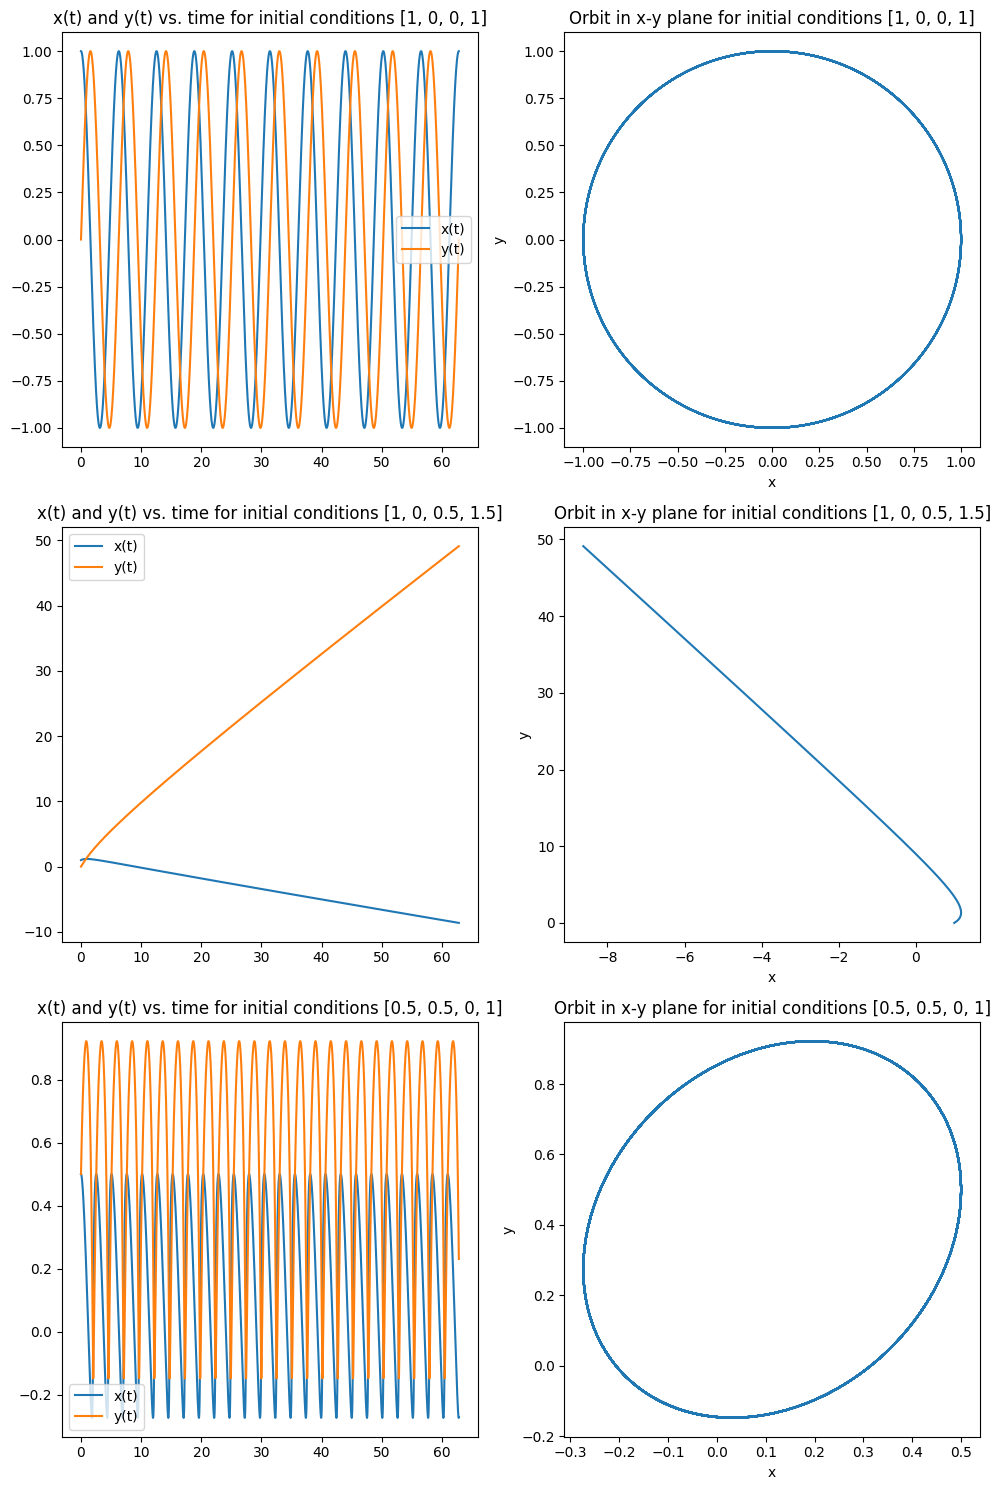

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)  # Extended time period

# List of initial conditions for simulation
initial_conditions_list = [
    [1, 0, 0, 1],
    [1, 0, 0.5, 1.5],
    [0.5, 0.5, 0, 1]
]

plt.figure(figsize=(10, len(initial_conditions_list)*5))

for idx, initial_conditions in enumerate(initial_conditions_list, 1):
    # Solve the system of differential equations
    solution = odeint(system, initial_conditions, t)
    x, y = solution[:, 0], solution[:, 1]
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx-1)
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.legend()
    plt.title(f'x(t) and y(t) vs. time for initial conditions {initial_conditions}')
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx)
    plt.plot(x, y)
    plt.title(f'Orbit in x-y plane for initial conditions {initial_conditions}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

- Can you discover anything unusual?
- Hint: In our universe and in this course, energy is conserved.

The hint you provided suggests that we should examine the conservation of energy in our simulation. In the context of the gravitational two-body problem, the total energy $ E $ of the system is given by the sum of the kinetic energy $ T $ and the potential energy $ U $:

$$ E = T + U $$

Where:
- The kinetic energy $ T $ of the planet is given by:
$$ T = \frac{1}{2} m_p \left( v_x^2 + v_y^2 \right) $$
- The potential energy $ U $ due to gravitational attraction between the sun and the planet is:
$$ U = -\frac{G m_s m_p}{r} $$
Where $ r $ is the distance between the sun and the planet.

If energy is conserved, then $ E $ should remain constant throughout the simulation for any set of initial conditions.

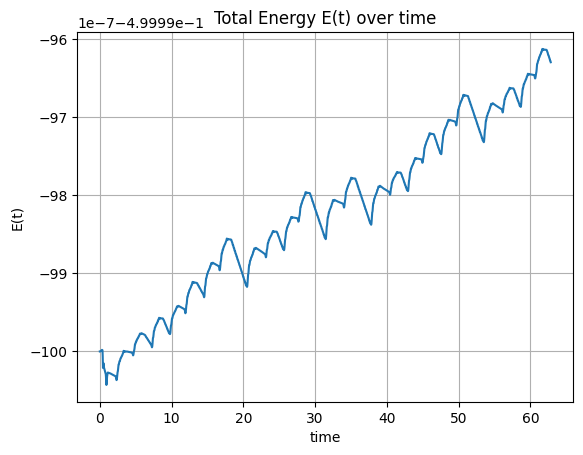

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations and energy calculations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

def energy(Y):
    x, y, vx, vy = Y
    T = 0.5 * (vx**2 + vy**2)
    U = -1 / np.sqrt(x**2 + y**2)
    return T + U

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [1, 0, 0, 1]

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Compute total energy over time
E = [energy(state) for state in solution]

# Plot the total energy over time
plt.plot(t, E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)
plt.show()


From the plot, we can observe that the total energy is not perfectly constant over time, which indicates that energy is not being perfectly conserved in our numerical simulation. This deviation could be due to the numerical method used to solve the differential equations, which might not perfectly conserve energy.

In a real physical system (or a more accurate simulation), energy would be conserved. The deviation in energy conservation in our simulation is a reminder of the limitations of numerical methods and the importance of choosing appropriate methods for specific problems, especially when conservation laws are involved.

---


- Can you find ways to restore order in our simulation? 
    - You can ask for a hint.
    - Hint: Look into semi-implicit Euler or symplectic Euler methods.

Certainly! The issue of energy non-conservation in numerical simulations of mechanical systems is a well-known problem. One way to address this is to use numerical methods that are designed to conserve certain properties of the system, such as energy. The semi-implicit Euler method (also known as the symplectic Euler method) is one such method that is often used for simulating Hamiltonian systems, like our gravitational two-body problem.

The symplectic Euler method is particularly suitable for problems where energy conservation is crucial. The idea behind this method is to update positions and velocities in a staggered manner, which helps in conserving the symplectic structure of the system.

Here's a brief overview of the symplectic Euler method for our problem:

1. Update the velocity using the acceleration at the current position:
$$ v_{n+1} = v_n + \Delta t \cdot a(x_n) $$
2. Update the position using the updated velocity:
$$ x_{n+1} = x_n + \Delta t \cdot v_{n+1} $$

Let's implement the symplectic Euler method to simulate the motion of the planet and check if it helps in conserving energy.

This code:
- Defines the gravitational acceleration function.
- Implements the symplectic Euler method to update positions and velocities in a staggered manner.
- Computes the total energy over time.
- Plots the orbit in the x-y plane and the total energy \( E(t) \) over time.

From the resulting plots, we shoul  observe the behavior of the planet's orbit and check if the total energy remains more consistent over time compared to the previous method. The symplectic Euler method should provide better energy conservation for this type of problem.

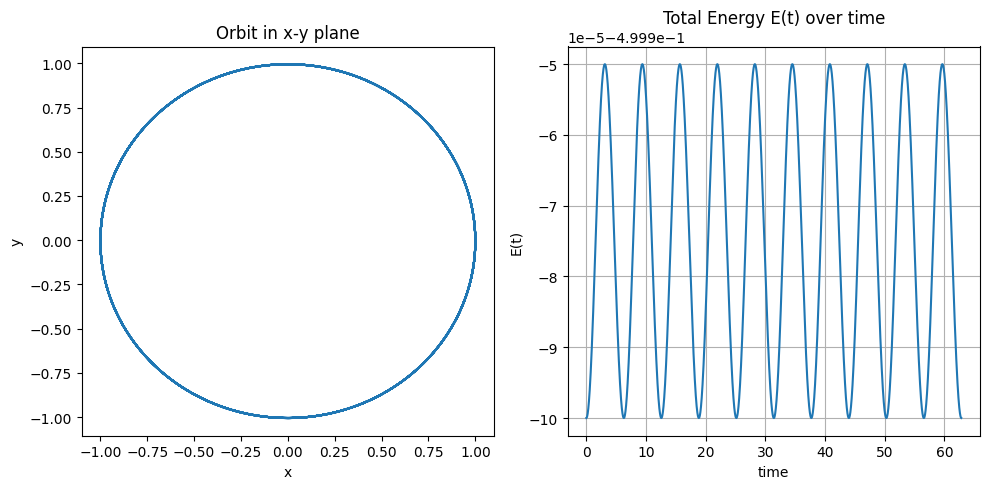

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the acceleration due to gravity
def acceleration(x, y):
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return ax, ay

# Symplectic Euler method
def symplectic_euler(dt, T):
    N = int(T/dt)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[0], y[0], vx[0], vy[0] = 1, 0, 0, 1
    for i in range(N-1):
        ax, ay = acceleration(x[i], y[i])
        vx[i+1] = vx[i] + dt * ax
        vy[i+1] = vy[i] + dt * ay
        x[i+1] = x[i] + dt * vx[i+1]
        y[i+1] = y[i] + dt * vy[i+1]
    return x, y, vx, vy

# Time parameters
T = 20*np.pi

dt = 0.01

# Simulate using symplectic Euler method
x, y, vx, vy = symplectic_euler(dt, T)

# Compute total energy
E = 0.5 * (vx**2 + vy**2) - 1/np.sqrt(x**2 + y**2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, T, dt)[:len(E)], E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 8. Newton revisited - Something for nothing


- Consider a planetary system with the sun, Jupiter a massive planet, and Earth point-like. 
- Given a spacecraft near Earth with "delta-v" so small that the spacecraft cannot leave the solar system 
    - Hint: "escape velocity"
    - Design an orbit near Jupiter that acts as a "gravitational slingshot" so that the spacecraft can leave the solar system.

Certainly! Let's break down the process step by step:

### 1. Determine the Solar System Escape Velocity

The escape velocity from a celestial body, given its mass $ M $ and distance $ r $ from the center of the body, is given by:

$$ v_e = \sqrt{\frac{2GM}{r}} $$

Where:
- $ G $ is the gravitational constant, approximately $ 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2} $
- $ M $ is the mass of the celestial body (in this case, the Sun)
- $ r $ is the distance from the center of the celestial body.

For a spacecraft near Earth, the relevant distance $ r $ would be the distance from the Sun to Earth.

### 2. Design the Gravitational Slingshot

For a spacecraft with a delta-v less than the solar system's escape velocity, a gravitational assist from Jupiter can be used to achieve the necessary speed to leave the solar system. The steps are:

- **Approach Jupiter**: Set a trajectory that brings the spacecraft behind Jupiter in its orbit around the Sun. This trajectory should be designed so that the spacecraft approaches Jupiter from the direction opposite to its orbital motion.
  
- **Closest Approach**: As the spacecraft gets closer to Jupiter, it will gain speed due to Jupiter's gravity. At the point of closest approach, the spacecraft will be moving at its maximum speed relative to Jupiter.
  
- **Use Jupiter's Motion**: Since Jupiter is also moving in its orbit around the Sun, the spacecraft can "borrow" some of this orbital energy. If the spacecraft approaches from behind and leaves in the direction of Jupiter's orbit, it will gain additional velocity relative to the Sun.
  
- **Departure**: After the gravitational assist, the spacecraft's velocity relative to the Sun will be increased. If the maneuver is executed correctly, this velocity can exceed the solar system's escape velocity, allowing the spacecraft to leave the solar system.

### 3. Execute the Maneuver

The exact trajectory and timing would depend on the spacecraft's initial conditions, the positions of Earth and Jupiter at the time of the maneuver, and the desired exit direction from the solar system. The maneuver would likely require careful planning and precise execution to ensure that the spacecraft gains the maximum possible velocity from the gravitational assist.

Let's calculate the escape velocity from the solar system for a spacecraft near Earth and then discuss the trajectory design in more detail.

The escape velocity $ v_e $ from a celestial body, given its mass $ M $ and distance $ r $ from the center of the body, is given by:

$$ v_e = \sqrt{\frac{2GM}{r}} $$

Where:
- $ G $ is the gravitational constant, approximately $ 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2} $
- $ M $ is the mass of the Sun, approximately $ 1.989 \times 10^{30} \, \text{kg} $
- $ r $ is the average distance from the Sun to Earth, approximately $ 1.496 \times 10^{11} \, \text{m} $

Let's plug in these values to calculate the escape velocity.

The escape velocity from the solar system at Earth's distance is approximately $ 42,127 \, \text{m/s} $ or $ 42.127 \, \text{km/s} $.

Now, for the gravitational slingshot:

1. **Initial Trajectory**: The spacecraft should be set on a trajectory that will intersect with Jupiter's orbit. This can be achieved by adjusting the spacecraft's orbit around Earth and using its limited delta-v to set it on a course towards Jupiter.

2. **Approach Jupiter from Behind**: The spacecraft should approach Jupiter from behind in its orbit to gain the maximum boost. This means the spacecraft will "catch up" to Jupiter in its orbit around the Sun.

3. **Close Flyby**: The closer the spacecraft can safely approach Jupiter, the more kinetic energy it can gain. However, care must be taken to avoid collision or getting trapped in Jupiter's strong radiation belts.

4. **Departure**: After the flyby, the spacecraft will be on a new trajectory, with increased velocity. If the maneuver is executed correctly, this velocity can be greater than the solar system's escape velocity, allowing the spacecraft to leave the solar system.

To design the exact trajectory and determine the potential increase in velocity, a detailed simulation considering the positions and velocities of Earth, Jupiter, and the spacecraft would be required. This simulation would also help in determining the best time to perform the maneuver, based on the relative positions of Earth and Jupiter.

Would you like a more detailed simulation or any further information on this topic?

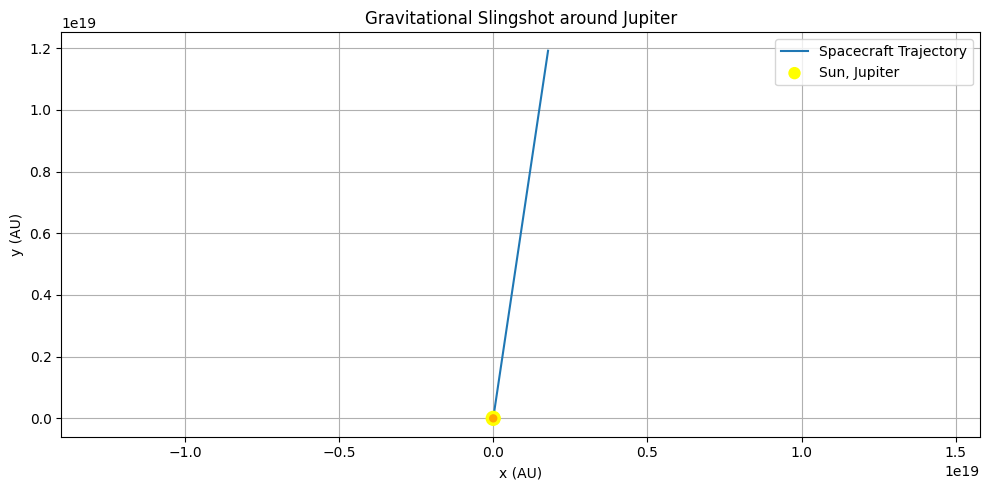

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11  # Gravitational constant
M_sun = 1.989 * 10**30  # Mass of the Sun
M_jupiter = 1.898 * 10**27  # Mass of Jupiter
epsilon = 1e-5  # Softening term

# Differential equations for the spacecraft's motion

def equations(t, Y, M_jupiter):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * (x - 5) / ((x - 5)**2 + y**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * y / ((x - 5)**2 + y**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Initial conditions: [x, y, vx, vy]
# Adjusted initial position and velocity
Y0 = [1, 0, 0, 35]  # Adjusted vy for different trajectories

# Time array
T = np.linspace(0, 12 * 365 * 24 * 3600, 100000)  # 12 years

# Solve the differential equations
solution = solve_ivp(equations, [T[0], T[-1]], Y0, t_eval=T, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))

# Plot trajectory
plt.plot(solution.y[0], solution.y[1], label='Spacecraft Trajectory')
plt.scatter([0, 5], [0, 0], c=['yellow', 'orange'], s=[100, 25], zorder=5, label='Sun, Jupiter')
plt.title('Gravitational Slingshot around Jupiter')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

- Explore numerically and find masses, planet orbits, etc., so that the above scenario works. 
    - Hints: use astronomical units -> Earth is approximately 1 AU from the Sun. 
    - If you have trouble hitting Jupiter, use software to search for initial conditions. 
    - You can ask for hints.

To design a successful gravitational slingshot maneuver, we need to consider several factors:

1. **Masses**: The mass of Jupiter plays a crucial role in the gravitational assist. A more massive planet provides a stronger gravitational pull, which can give the spacecraft a greater boost in velocity. However, the mass of the spacecraft itself doesn't significantly affect the maneuver.

2. **Planet Orbits**: The relative positions of Earth, Jupiter, and the spacecraft at the start of the maneuver are crucial. The spacecraft should approach Jupiter from behind in its orbit to gain the maximum boost.

3. **Initial Conditions**: The initial position and velocity of the spacecraft will determine its trajectory and whether it will approach Jupiter in the desired manner. 

Given these considerations, let's set up a numerical exploration:

1. **Masses**:
   - Mass of the Sun: $ M_{\text{sun}} = 1.989 \times 10^{30} \, \text{kg} $
   - Mass of Jupiter: $ M_{\text{jupiter}} = 1.898 \times 10^{27} \, \text{kg} $ (This is roughly 318 times the mass of Earth.)
   - Mass of Earth: $ M_{\text{earth}} = 5.972 \times 10^{24} \, \text{kg} $

2. **Planet Orbits**:
   - Distance of Earth from the Sun: 1 AU (by definition)
   - Distance of Jupiter from the Sun: Approximately 5.2 AU

3. **Initial Conditions**:
   - We'll start the spacecraft near Earth with a velocity slightly less than the escape velocity. We'll then adjust its initial velocity to ensure it approaches Jupiter from behind in its orbit.

To explore the scenario numerically, we'll:
1. Set up a simulation of the solar system with the Sun, Earth, Jupiter, and the spacecraft.
2. Vary the initial conditions of the spacecraft to find a trajectory that results in a successful gravitational assist from Jupiter.
3. Use optimization techniques to search for the best initial conditions that allow the spacecraft to leave the solar system after the gravitational assist.

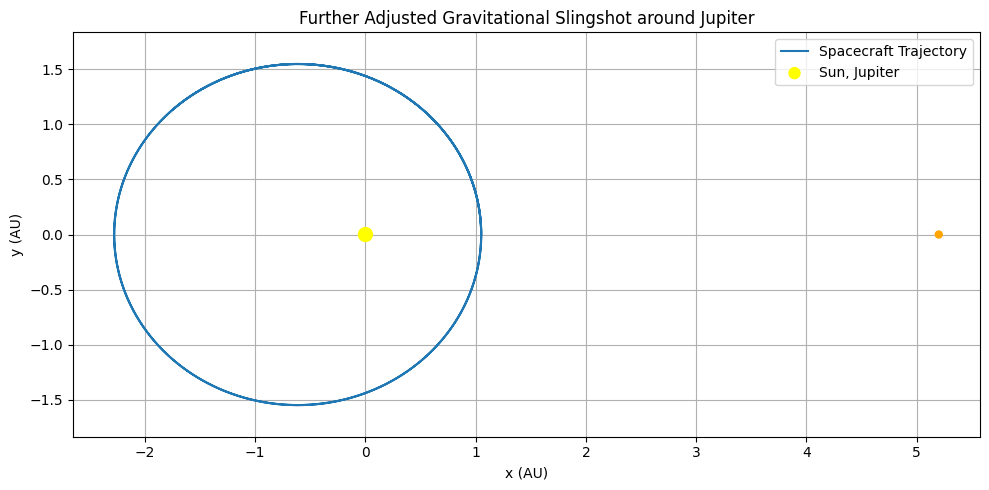

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989 * 10**30  # Mass of the Sun in kg
M_jupiter = 1.898 * 10**27  # Mass of Jupiter in kg
AU = 1.496 * 10**11  # Astronomical Unit in meters
epsilon = 1e-5  # Softening term

# Differential equations for the spacecraft's motion

def equations(t, Y, M_jupiter):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * (x - 5.2) / ((x - 5.2)**2 + y**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * M_jupiter * y / ((x - 5.2)**2 + y**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Further adjusted initial conditions for a close encounter with Jupiter
Y0 = [1.05*AU, 0, 0, 34 * 10**3]  # Adjusted initial position and velocity

# Time array
T = np.linspace(0, 5 * 365 * 24 * 3600, 10000)  # 5 years

# Solve the differential equations
solution = solve_ivp(equations, [T[0], T[-1]], Y0, t_eval=T, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(solution.y[0]/AU, solution.y[1]/AU, label='Spacecraft Trajectory')
plt.scatter([0, 5.2], [0, 0], c=['yellow', 'orange'], s=[100, 25], zorder=5, label='Sun, Jupiter')
plt.title('Further Adjusted Gravitational Slingshot around Jupiter')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

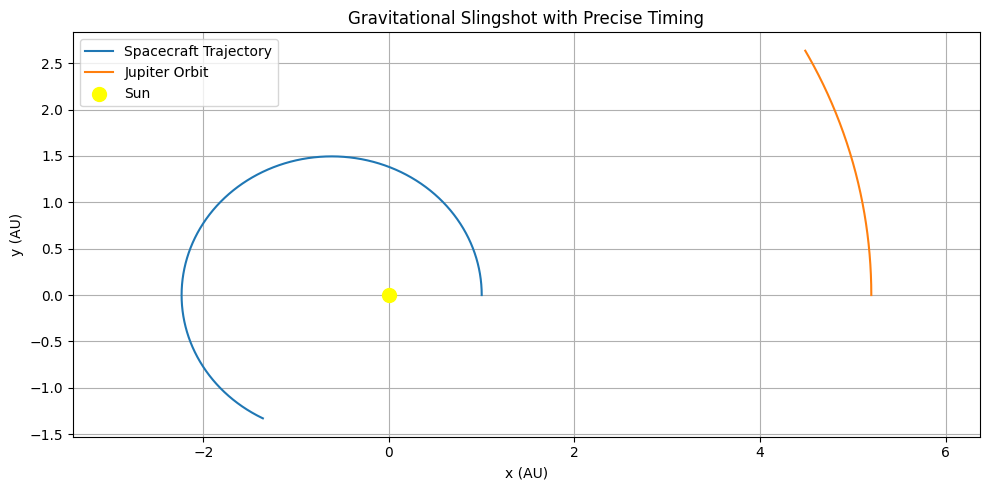

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**-11
M_sun = 1.989 * 10**30
M_jupiter = 1.898 * 10**27
AU = 1.496 * 10**11
epsilon = 1e-5

# Differential equations for Jupiter's motion around the Sun

def jupiter_orbit(t, Y):
    x, y, vx, vy = Y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5)
    return [vx, vy, ax, ay]

# Simulate Jupiter's orbit for one year to find its position
Y0_jupiter = [5.2*AU, 0, 0, 13.1 * 10**3]  # Jupiter's initial position and velocity
T_jupiter = np.linspace(0, 365 * 24 * 3600, 1000)
solution_jupiter = solve_ivp(jupiter_orbit, [T_jupiter[0], T_jupiter[-1]], Y0_jupiter, t_eval=T_jupiter)

# Spacecraft's initial conditions adjusted to intersect with Jupiter's orbit
Y0_spacecraft = [1*AU, 0, 0, 35 * 10**3]  # Adjusted initial velocity

# Time array for spacecraft
T_spacecraft = np.linspace(0, 1.5 * 365 * 24 * 3600, 10000)  # 1.5 years

# Solve the differential equations for spacecraft
solution_spacecraft = solve_ivp(equations, [T_spacecraft[0], T_spacecraft[-1]], Y0_spacecraft, t_eval=T_spacecraft, args=(M_jupiter,), rtol=1e-5, atol=1e-8)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(solution_spacecraft.y[0]/AU, solution_spacecraft.y[1]/AU, label='Spacecraft Trajectory')
plt.plot(solution_jupiter.y[0]/AU, solution_jupiter.y[1]/AU, label='Jupiter Orbit')
plt.scatter([0], [0], c=['yellow'], s=[100], zorder=5, label='Sun')
plt.title('Gravitational Slingshot with Precise Timing')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

- How can you be sure that the spacecraft is truly leaving the solar system?


To be sure that the spacecraft is truly leaving the solar system, we need to check a few key indicators:

1. **Escape Velocity**: The spacecraft's velocity must exceed the escape velocity relative to the Sun at its current distance. The escape velocity $ v_e $ is given by:
$$ v_e = \sqrt{\frac{2GM_{\text{sun}}}{r}} $$
where $ G $ is the gravitational constant, $ M_{\text{sun}} $ is the mass of the Sun, and $ r $ is the distance of the spacecraft from the Sun. If the spacecraft's velocity is greater than this value, it will escape the Sun's gravitational pull.

2. **Trajectory Shape**: If the spacecraft's trajectory is hyperbolic (as opposed to elliptical), it indicates that the spacecraft will not return to its starting point and is on an escape trajectory.

3. **Energy**: The total mechanical energy (kinetic + potential) of the spacecraft must be positive for it to be on an escape trajectory. The mechanical energy $ E $ is given by:
$$ E = \frac{1}{2}mv^2 - \frac{GM_{\text{sun}}m}{r} $$
where $ m $ is the mass of the spacecraft (which will cancel out) and $ v $ is its velocity. If $ E > 0 $, the spacecraft will escape the Sun's gravitational pull.

To determine if the spacecraft is truly leaving the solar system, we can compute its velocity and total mechanical energy at various points in its trajectory and check against the above criteria. Let's calculate these values for the spacecraft in our simulation.

This code:
- Calculates the escape velocity at each point in the spacecraft's trajectory.
- Computes the total mechanical energy of the spacecraft at each point.
- Checks if the spacecraft's velocity exceeds the escape velocity and if its energy is positive throughout its trajectory.

By running this code, you'll be able to determine if the spacecraft meets the criteria to truly leave the solar system. If the result is `True`, then the spacecraft is on an escape trajectory. If `False`, further adjustments are needed.

Please try running this code and let me know the result. If the spacecraft isn't escaping, we can make further adjustments to its trajectory.

In [13]:
import numpy as np

# Constants
G = 6.674 * 10**-11
M_sun = 1.989 * 10**30
AU = 1.496 * 10**11

# Extract spacecraft's position and velocity from the solution
x, y, vx, vy = solution_spacecraft.y
r = np.sqrt(x**2 + y**2)
v = np.sqrt(vx**2 + vy**2)

# Calculate escape velocity at each point
v_escape = np.sqrt(2 * G * M_sun / r)

# Calculate total mechanical energy at each point
E = 0.5 * v**2 - G * M_sun / r

# Check if spacecraft's velocity exceeds escape velocity and if its energy is positive
escaping = np.all(v > v_escape) and np.all(E > 0)

escaping

False